# Micro-Credit Defaulter Project

Problem Statement: 

A Microfinance Institution (MFI) is an organization that offers financial services to low income populations. MFS becomes very useful when targeting especially the unbanked poor families living in remote areas with not much sources of income. The Microfinance services (MFS) provided by MFI are Group Loans, Agricultural Loans, Individual Business Loans and so on. 
Many microfinance institutions (MFI), experts and donors are supporting the idea of using mobile financial services (MFS) which they feel are more convenient and efficient, and cost saving, than the traditional high-touch model used since long for the purpose of delivering microfinance services. Though, the MFI industry is primarily focusing on low income families and are very useful in such areas, the implementation of MFS has been uneven with both significant challenges and successes.

Today, microfinance is widely accepted as a poverty-reduction tool, representing $70 billion in outstanding loans and a global outreach of 200 million clients.

We are working with one such client that is in Telecom Industry. They are a fixed wireless telecommunications network provider. They have launched various products and have developed its business and organization based on the budget operator model, offering better products at Lower Prices to all value conscious customers through a strategy of disruptive innovation that focuses on the subscriber. 

They understand the importance of communication and how it affects a person’s life, thus, focusing on providing their services and products to low income families and poor customers that can help them in the need of hour. 
They are collaborating with an MFI to provide micro-credit on mobile balances to be paid back in 5 days. The Consumer is believed to be defaulter if he deviates from the path of paying back the loaned amount within the time duration of 5 days. For the loan amount of 5 (in Indonesian Rupiah), payback amount should be 6 (in Indonesian Rupiah), while, for the loan amount of 10 (in Indonesian Rupiah), the payback amount should be 12 (in Indonesian Rupiah). 

The sample data is provided to us from our client database. It is hereby given to you for this exercise. In order to improve the selection of customers for the credit, the client wants some predictions that could help them in further investment and improvement in selection of customers. 

Exercise:
Build a model which can be used to predict in terms of a probability for each loan transaction, whether the customer will be paying back the loaned amount within 5 days of insurance of loan. In this case, Label ‘1’ indicates that the loan has been payed i.e. Non- defaulter, while, Label ‘0’ indicates that the loan has not been payed i.e. defaulter.  

Points to Remember:
•	There are no null values in the dataset. 
•	There may be some customers with no loan history. 
•	The dataset is imbalanced. Label ‘1’ has approximately 87.5% records, while, label ‘0’ has approximately 12.5% records.
•	For some features, there may be values which might not be realistic. You may have to observe them and treat them with a suitable explanation.
•	You might come across outliers in some features which you need to handle as per your understanding. Keep in mind that data is expensive and we cannot lose more than 7-8% of the data.  
Find Enclosed the Data Description File and The Sample Data for the Modeling Exercise.












In [1]:
#Importing required packages & libraries.

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading the train and test dataset
df=pd.read_csv(r"C:\Users\HP\Desktop\Micro Credit Project\Data file.csv")

print("Shape of the dataset:", df.shape)

Shape of the dataset: (209593, 37)


We can see the dataset contains 209593 rows and 37 columns.

In [3]:
#printing the head of datadset
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,UPW,2016-07-20
1,2,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,UPW,2016-08-10
2,3,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,UPW,2016-08-19
3,4,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,UPW,2016-06-06
4,5,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,UPW,2016-06-22


In [4]:
#printing the tail of datadset
df.tail()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
209588,209589,1,22758I85348,404.0,151.872333,151.872333,1089.19,1089.19,1.0,0.0,...,6.0,0.0,2.0,12,6,0.0,1.0,1.000000,UPW,2016-06-17
209589,209590,1,95583I84455,1075.0,36.936000,36.936000,1728.36,1728.36,4.0,0.0,...,6.0,0.0,3.0,18,6,0.0,1.0,1.000000,UPW,2016-06-12
209590,209591,1,28556I85350,1013.0,11843.111667,11904.350000,5861.83,8893.20,3.0,0.0,...,12.0,0.0,6.0,54,12,0.0,4.0,3.833333,UPW,2016-07-29
209591,209592,1,59712I82733,1732.0,12488.228333,12574.370000,411.83,984.58,2.0,38.0,...,12.0,0.0,3.0,24,12,0.0,0.0,10.500000,UPW,2016-07-25
209592,209593,1,65061I85339,1581.0,4489.362000,4534.820000,483.92,631.20,13.0,0.0,...,12.0,0.0,2.0,18,12,0.0,0.0,0.000000,UPW,2016-07-07


In [5]:
#printing the sample of datadset
df.sample()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
66646,66647,1,41357I70788,132.0,49.616667,49.616667,155.61,155.61,2.0,0.0,...,6.0,0.0,3.0,18,6,0.0,9.666667,9.666667,UPW,2016-06-13


By printing the head, tail and sample of the dataset we can get a general idea how our dataset looks. Here we observe that in the first there is a column 'Unnamed: 0', It is not at all necessary for our work because these are numberings of the dataset rows. So, we will drop it a little later!

In [6]:
#checking unique values in each column
df.nunique()

Unnamed: 0              209593
label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianam

Here we find that the columns 'Unnamed: 0' and 'pcircle' can be dropped as the first one contains the numbers of the rows in the dataset and the latter comtains only one type of input, viz., 'UPW'. Thus we will drop it as it is not necessary for prediction of loan repayment.
We also observe that there are two columns 'msisdn' and 'pdate' having object type data. These we will convert to float/date type.

In [7]:
# dropping unimportant columns
df.drop(['Unnamed: 0','pcircle'], axis=1, inplace=True)

df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate
0,0,21408I70789,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20
1,1,76462I70374,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10
2,1,17943I70372,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19
3,1,55773I70781,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06
4,1,03813I82730,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22


We have dropped the columns.

In [8]:
#checking the shape of data after dropping columns
df.shape

(209593, 35)

We can see the columns have been dropped.

In [9]:
#checking null values
df.isnull().sum()

label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pdate                   0
dtype: int64

In [10]:
df.isnull().sum().sum()

0

We observe that there are no null values in the dataset.

We will now extract month from the 'pdate' column and save it in a new column 'month'.

In [11]:
# Extract month and year from the date column
df["month"] = pd.to_datetime(df["pdate"], format = "%Y/%m/%d").dt.month

As we have extracted the month seperately we can now proceed with encoding the columns using LabelEncoder.

In [12]:
# Encoding columns as part of transformation.
from sklearn.preprocessing import LabelEncoder 
le= LabelEncoder()

df['msisdn'] = le.fit_transform(df['msisdn'])
df.head(5)

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pdate,month
0,0,40191,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,...,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,2016-07-20,7
1,1,142291,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,...,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,2016-08-10,8
2,1,33594,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,...,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,2016-08-19,8
3,1,104157,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,...,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,2016-06-06,6
4,1,6910,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,...,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,2016-06-22,6


In [13]:
#checking detailed info of dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  int32  
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

The '.info()' methods helps us understand the type of data in each column. Here we can see that there is mostly numerical data. The set is complete which means the datset does not have any null values. 

We will check the same using a heatmap.

In [14]:
# using isnull() function   
if df.isnull() is True:
    print("Null is present")
else:
    print("Null is NOT present")
    
#df.isnull()

Null is NOT present


<AxesSubplot:>

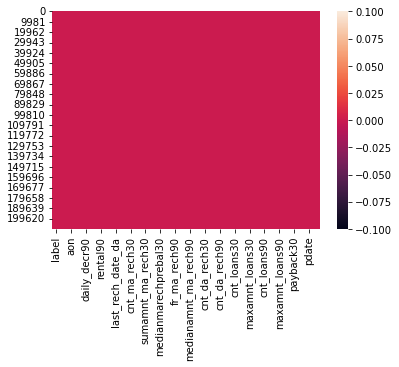

In [15]:
# Checking for null using HeatMap
sns.heatmap(df.isnull())

We can see there are no null values present. This is a good sign for us to proceed forward. 

In [16]:
#checking duplicate values
if df.duplicated() is True:
    print("Rows duplicated")
else:
    print("NO duplicates")


NO duplicates


We can see that duplicates are also not present.

In [17]:
df.nunique()

label                        2
msisdn                  186243
aon                       4507
daily_decr30            147025
daily_decr90            158669
rental30                132148
rental90                141033
last_rech_date_ma         1186
last_rech_date_da         1174
last_rech_amt_ma            70
cnt_ma_rech30               71
fr_ma_rech30              1083
sumamnt_ma_rech30        15141
medianamnt_ma_rech30       510
medianmarechprebal30     30428
cnt_ma_rech90              110
fr_ma_rech90                89
sumamnt_ma_rech90        31771
medianamnt_ma_rech90       608
medianmarechprebal90     29785
cnt_da_rech30             1066
fr_da_rech30              1072
cnt_da_rech90               27
fr_da_rech90                46
cnt_loans30                 40
amnt_loans30                48
maxamnt_loans30           1050
medianamnt_loans30           6
cnt_loans90               1110
amnt_loans90                69
maxamnt_loans90              3
medianamnt_loans90           6
payback3

In [18]:
#Understanding the status of loans. We will demarcate success of loan by '1' and failure by '0'.
Total = df.shape[0]
print("Total: ",Total)

loan_Success = df[df['label'] == 1]
loan_Failure = df[df['label'] == 0]

x = len(loan_Failure)/Total
y = len(loan_Success)/Total

print('Loan Failure :',len(loan_Failure))
print('Loan Success :',len(loan_Success))


print('Loan Failure :',x*100,'%')
print('Loan Success :',y*100,'%')

Total:  209593
Loan Failure : 26162
Loan Success : 183431
Loan Failure : 12.482287099282896 %
Loan Success : 87.5177129007171 %


The above data presents to us the status of applicants loan status. We understand success or non defaulter by '1' and failure or defaulter by '0'.

Text(0, 0.5, 'Frequency')

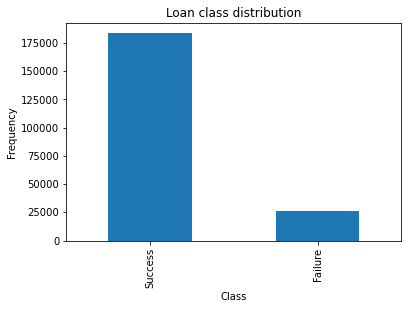

In [19]:
# Let's plot the Transaction class against the Frequency
labels = ['Success','Failure']
classes = pd.value_counts(df['label'], sort = True)
#classes.plot(kind = 'bar', rot=0)
classes.plot(kind = 'bar')
plt.title("Loan class distribution")
plt.xticks(range(2), labels)
plt.xlabel("Class")
plt.ylabel("Frequency")

This gives us a details of success and failure. We can see the data is imbalanced. 

In [20]:
df.describe()

,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
count,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,...,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000,209593.000000
mean,0.875177,93100.650179,8112.343445,5381.402289,6082.515068,2692.581910,3483.406534,3755.847800,3712.202921,2064.452797,...,17.952021,274.658747,0.054029,18.520919,23.645398,6.703134,0.046077,3.398826,4.321485,6.797321
std,0.330519,53758.461427,75696.082531,9220.623400,10918.812767,4308.586781,5770.461279,53905.892230,53374.833430,2370.786034,...,17.379741,4245.264648,0.218039,224.797423,26.469861,2.103864,0.200692,8.813729,10.308108,0.741435
min,0.000000,0.000000,-48.000000,-93.012667,-93.012667,-23737.140000,-24720.580000,-29.000000,-29.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
25%,1.000000,46506.000000,246.000000,42.440000,42.692000,280.420000,300.260000,1.000000,0.000000,770.000000,...,6.000000,6.000000,0.000000,1.000000,6.000000,6.000000,0.000000,0.000000,0.000000,6.000000
50%,1.000000,93073.000000,527.000000,1469.175667,1500.000000,1083.570000,1334.000000,3.000000,0.000000,1539.000000,...,12.000000,6.000000,0.000000,2.000000,12.000000,6.000000,0.000000,0.000000,1.666667,7.000000
75%,1.000000,139626.000000,982.000000,7244.000000,7802.790000,3356.940000,4201.790000,7.000000,0.000000,2309.000000,...,24.000000,6.000000,0.000000,5.000000,30.000000,6.000000,0.000000,3.750000,4.500000,7.000000
max,1.000000,186242.000000,999860.755168,265926.000000,320630.000000,198926.110000,200148.110000,998650.377733,999171.809410,55000.000000,...,306.000000,99864.560864,3.000000,4997.517944,438.000000,12.000000,3.000000,171.500000,171.500000,8.000000


From the above statistical analysis it is clearly see that there is difference between the 75th percentile and max so this is an indication of the outliers in the dataset.


<AxesSubplot:xlabel='month', ylabel='aon'>

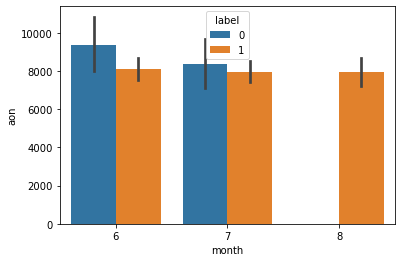

In [21]:
sns.barplot(x='month',y='aon',hue='label',data=df)

Here is a comparison between ‘aon’ and month. We find there are no defaulter in 8th month i.e. August month of 2016 year. 

<AxesSubplot:xlabel='month', ylabel='fr_da_rech90'>

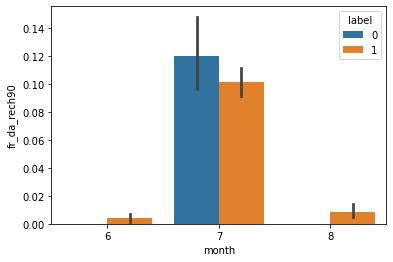

In [22]:
sns.barplot(x='month',y='fr_da_rech90',hue='label',data=df)


Here we are comparing frequency of data account recharged in last 90 days with the months June, July and August. We can see the frequency is more in month July and least in June. In July month we see that there a huge number of defaulter accounts that had recharged.

<AxesSubplot:xlabel='month', ylabel='cnt_loans30'>

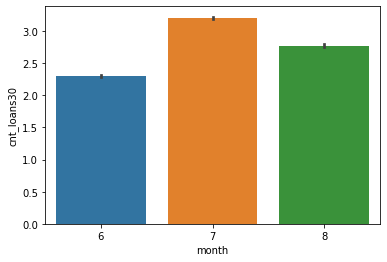

In [23]:
sns.barplot(x='month',y='cnt_loans30',data=df)

<AxesSubplot:xlabel='month', ylabel='cnt_loans30'>

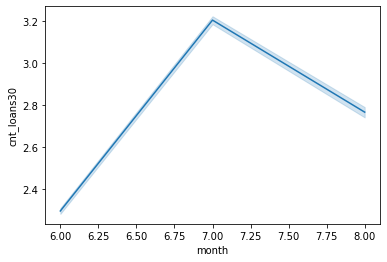

In [24]:
sns.lineplot(x='month',y='cnt_loans30',data=df)

From the above it is very much clear that most of the users had taken loan in the month of July and demand decreased in August. The max count of loan is 1 and 2, however, the highest is 3.

<AxesSubplot:xlabel='cnt_loans30', ylabel='count'>

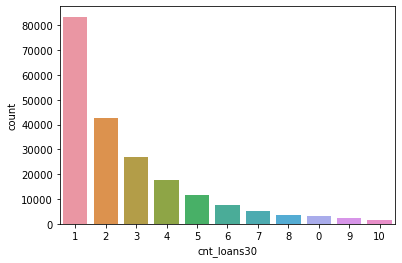

In [25]:
sns.countplot(x='cnt_loans30',data=df,order=df.cnt_loans30.value_counts().iloc[:11].index)


We can see that maximum customers had taken loan for once. This was followed by customers who tool loans twice and thrice respectively. These covers almost 90% of the total data given to us.

<AxesSubplot:xlabel='amnt_loans30', ylabel='count'>

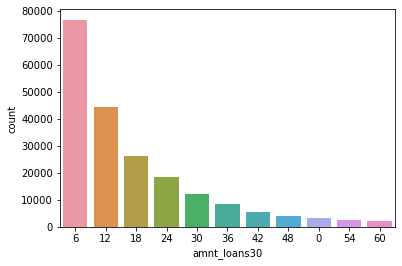

In [26]:
sns.countplot(x='amnt_loans30',order=df.amnt_loans30.value_counts().iloc[:11].index,data=df)


The highest total loan amount that user had taken in the last 30 days is 6, followed by 12,15 and 24. 

In [27]:
#Remove unwanted Columns
df.drop(['msisdn','pdate'],axis=1,inplace=True)

Here we have removed the 'msisdn' which was the mobile number of the customers and the 'pdate' which was the date of the records we are using. As the records are of the year 2016 so we have maintained the necessary information in a seperate column named 'month'. 

In [28]:
df.head()

,label,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,last_rech_amt_ma,cnt_ma_rech30,...,amnt_loans30,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,month
0,0,272.0,3055.050000,3065.150000,220.13,260.13,2.0,0.0,1539,2,...,12,6.0,0.0,2.0,12,6,0.0,29.000000,29.000000,7
1,1,712.0,12122.000000,12124.750000,3691.26,3691.26,20.0,0.0,5787,1,...,12,12.0,0.0,1.0,12,12,0.0,0.000000,0.000000,8
2,1,535.0,1398.000000,1398.000000,900.13,900.13,3.0,0.0,1539,1,...,6,6.0,0.0,1.0,6,6,0.0,0.000000,0.000000,8
3,1,241.0,21.228000,21.228000,159.42,159.42,41.0,0.0,947,0,...,12,6.0,0.0,2.0,12,6,0.0,0.000000,0.000000,6
4,1,947.0,150.619333,150.619333,1098.90,1098.90,4.0,0.0,2309,7,...,42,6.0,0.0,7.0,42,6,0.0,2.333333,2.333333,6


The dataset looks good for us to proceed further. 

In [29]:
for colm in df.columns:
    if(df[colm].min()<0):
        print(colm)

aon
daily_decr30
daily_decr90
rental30
rental90
last_rech_date_ma
last_rech_date_da
medianmarechprebal30
medianmarechprebal90


In [30]:
for col in df.columns:
    df[col][df[col] < 0] = 0

(array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
        18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34]),
 [Text(1, 0, 'label'),
  Text(2, 0, 'aon'),
  Text(3, 0, 'daily_decr30'),
  Text(4, 0, 'daily_decr90'),
  Text(5, 0, 'rental30'),
  Text(6, 0, 'rental90'),
  Text(7, 0, 'last_rech_date_ma'),
  Text(8, 0, 'last_rech_date_da'),
  Text(9, 0, 'last_rech_amt_ma'),
  Text(10, 0, 'cnt_ma_rech30'),
  Text(11, 0, 'fr_ma_rech30'),
  Text(12, 0, 'sumamnt_ma_rech30'),
  Text(13, 0, 'medianamnt_ma_rech30'),
  Text(14, 0, 'medianmarechprebal30'),
  Text(15, 0, 'cnt_ma_rech90'),
  Text(16, 0, 'fr_ma_rech90'),
  Text(17, 0, 'sumamnt_ma_rech90'),
  Text(18, 0, 'medianamnt_ma_rech90'),
  Text(19, 0, 'medianmarechprebal90'),
  Text(20, 0, 'cnt_da_rech30'),
  Text(21, 0, 'fr_da_rech30'),
  Text(22, 0, 'cnt_da_rech90'),
  Text(23, 0, 'fr_da_rech90'),
  Text(24, 0, 'cnt_loans30'),
  Text(25, 0, 'amnt_loans30'),
  Text(26, 0, 'maxamnt_loans30'),
  Text(27, 

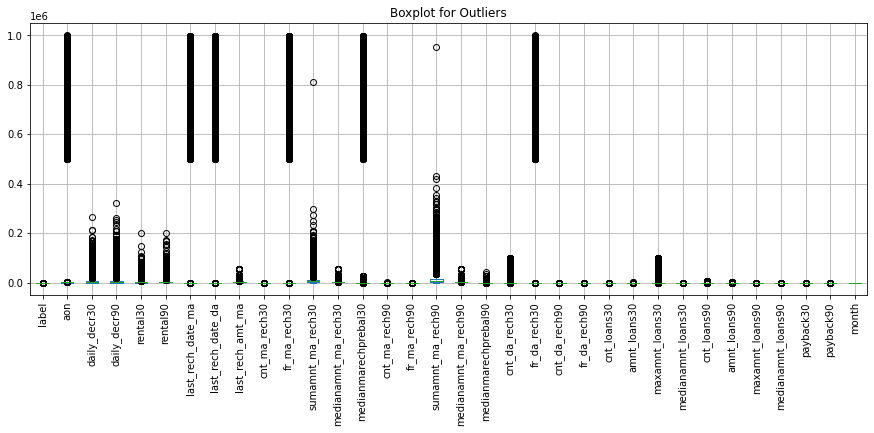

In [31]:
df.plot(kind='box',grid=True,title="Boxplot for Outliers",legend=True,rot=30,figsize=(15,5))
plt.xticks(rotation=90)

In [32]:
#Handling Outlier
from scipy.stats import zscore
z_score=abs(zscore(df))
sbi=df[(z_score < 3).all(axis=1)]

In [33]:
df.skew()

label                   -2.270254
aon                     10.392950
daily_decr30             3.946238
daily_decr90             4.252572
rental30                 4.549979
rental90                 4.458345
last_rech_date_ma       14.790974
last_rech_date_da       14.814857
last_rech_amt_ma         3.781149
cnt_ma_rech30            3.283842
fr_ma_rech30            14.772833
sumamnt_ma_rech30        6.386787
medianamnt_ma_rech30     3.512324
medianmarechprebal30    14.779881
cnt_ma_rech90            3.425254
fr_ma_rech90             2.285423
sumamnt_ma_rech90        4.897950
medianamnt_ma_rech90     3.752706
medianmarechprebal90    45.079058
cnt_da_rech30           17.818364
fr_da_rech30            14.776430
cnt_da_rech90           27.267278
fr_da_rech90            28.988083
cnt_loans30              2.713421
amnt_loans30             2.975719
maxamnt_loans30         17.658052
medianamnt_loans30       4.551043
cnt_loans90             16.594408
amnt_loans90             3.150006
maxamnt_loans9

In [34]:
for col in df.columns:
    if df.skew().loc[col] > 0.55:
        df[col]=np.log1p(df[col])

In [35]:
df.skew()

label                   -2.270254
aon                      0.924923
daily_decr30            -0.453719
daily_decr90            -0.429730
rental30                -1.320837
rental90                -1.288806
last_rech_date_ma        4.361266
last_rech_date_da        9.853534
last_rech_amt_ma        -2.190580
cnt_ma_rech30           -0.002013
fr_ma_rech30             4.071763
sumamnt_ma_rech30       -1.762898
medianamnt_ma_rech30    -1.867802
medianmarechprebal30     0.280374
cnt_ma_rech90           -0.033410
fr_ma_rech90             0.518606
sumamnt_ma_rech90       -2.023724
medianamnt_ma_rech90    -2.235333
medianmarechprebal90    -0.550959
cnt_da_rech30           13.709136
fr_da_rech30            13.840685
cnt_da_rech90            8.491552
fr_da_rech90            18.083017
cnt_loans30              0.720970
amnt_loans30            -0.026725
maxamnt_loans30          9.512099
medianamnt_loans30       3.995359
cnt_loans90              3.191439
amnt_loans90             0.241660
maxamnt_loans9

[]

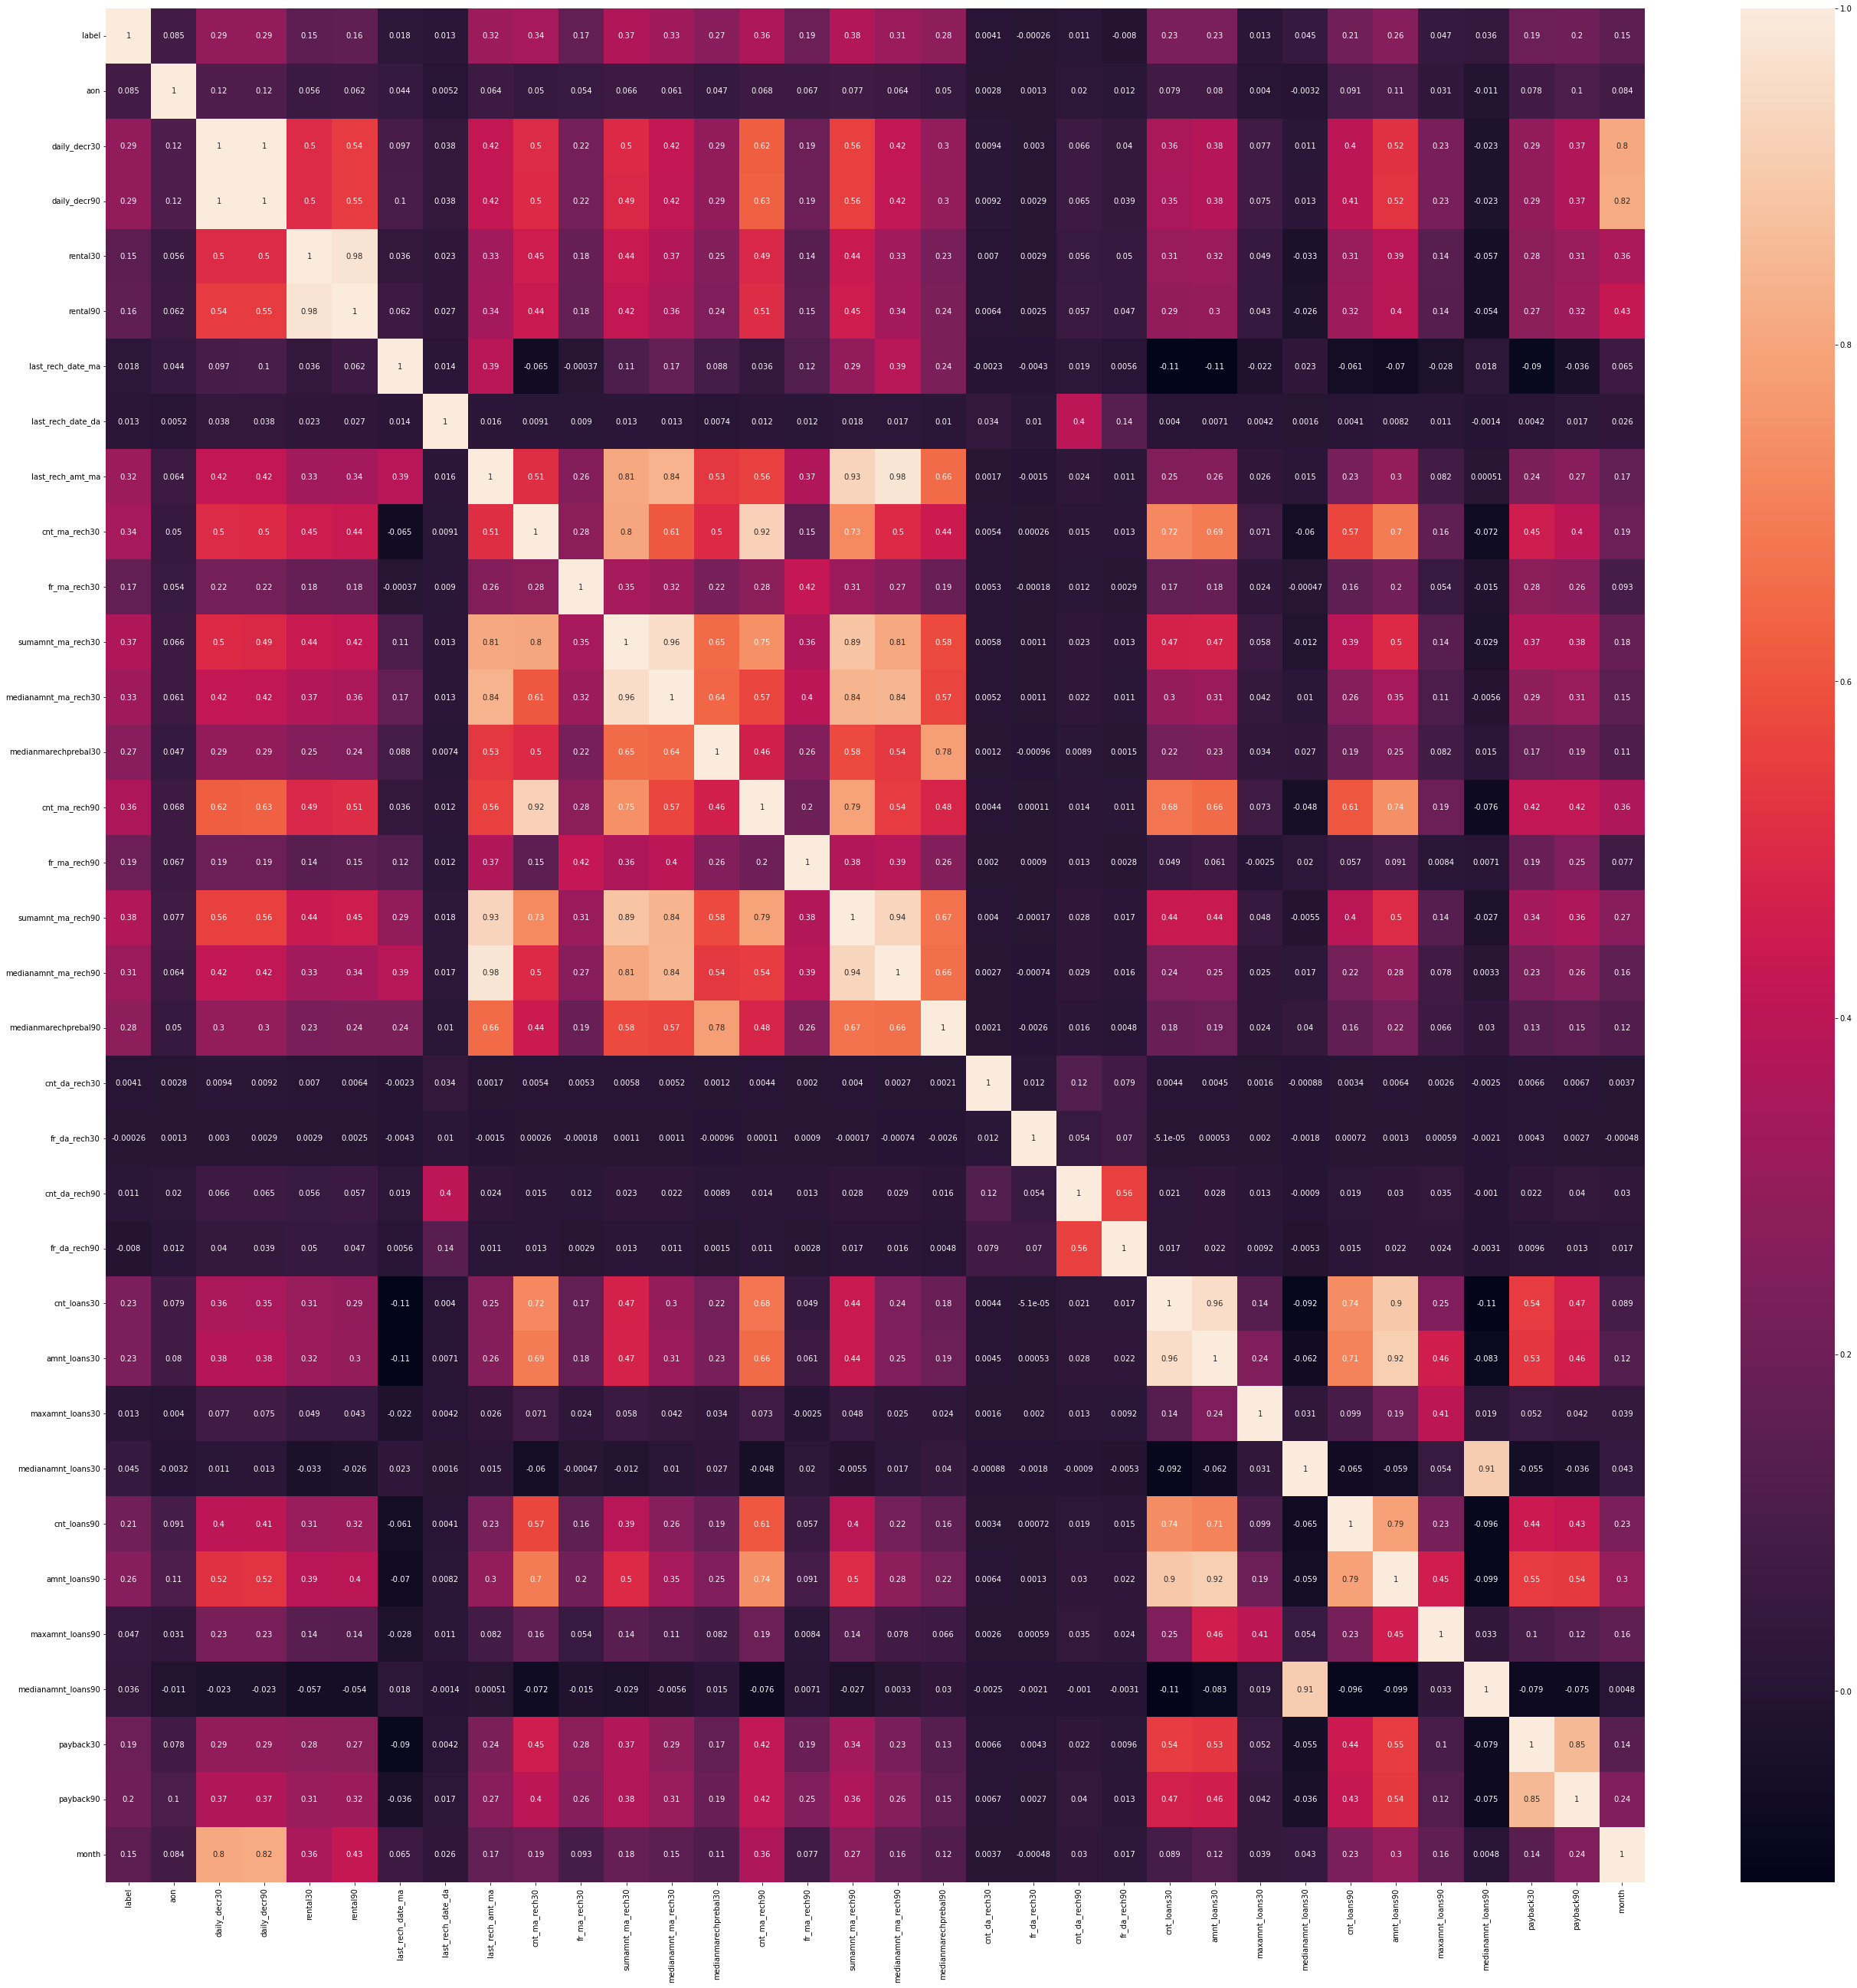

In [36]:
#Plotting heatmap
plt.figure(figsize=(45,45))
sns.heatmap(df.corr(),annot=True)
plt.plot()

Features and Target Value

In [37]:
x = df.drop(columns=['label'])
y = df[["label"]]
print(x.shape)
print(y.shape)

(209593, 33)
(209593, 1)


Standardisation



In [38]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()

x=sc.fit_transform(x)
x

array([[-0.46789578,  0.56858765,  0.54685919, ...,  2.57940512,
         2.29076126,  0.27336037],
       [ 0.2998416 ,  1.03619689,  1.00744078, ..., -0.85317526,
        -0.93109979,  1.62209905],
       [ 0.07164414,  0.30343618,  0.28400371, ..., -0.85317526,
        -0.93109979,  1.62209905],
       ...,
       [ 0.58148384,  1.02829913,  1.0012959 , ...,  0.77111301,
         0.56136261,  0.27336037],
       [ 1.01009381,  1.04629646,  1.0196374 , ..., -0.85317526,
         1.38246861,  0.27336037],
       [ 0.93718817,  0.69917052,  0.67803591, ..., -0.85317526,
        -0.93109979,  0.27336037]])

Spilt Train and Test



In [39]:
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict,GridSearchCV
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score
from sklearn.preprocessing import StandardScaler 

In [40]:
# Importing the neccesary sklearn libraries.

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
#from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_curve, auc, confusion_matrix

In [41]:
def m (clf ,X, y):
    max_acc_scr = 0
    for r_state in range(42,101):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .20, random_state = r_state)
        clf.fit(X_train, y_train)
        pred = clf.predict(X_test)
        acc_scr = accuracy_score(pred, y_test)
        if acc_scr > max_acc_scr:
            max_acc_scr = acc_scr
            final_r_state = r_state
    
    print("Maximum Accuracy score is :", max_acc_scr, "achieved at :", final_r_state)
    print("\n")
    print("Train Accuracy :",clf.score(X_train, y_train))
    print("Test Accuracy :",clf.score(X_test, y_test))
    print("\n")
    print("Classification Report :\n", classification_report(pred, y_test))
    print("\n")
    print("Confusion Matrix :\n", confusion_matrix(pred, y_test))
    print("\n")
    false_positive_rate, true_positive_rate, threshold = roc_curve(pred, y_test)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC_CURVE :", roc_auc)

In [42]:
# Creating the instances for the algorithms.

lr = LogisticRegression()
GNB = GaussianNB()
dt = DecisionTreeClassifier()
#rfc = RandomForestClassifier()

In [43]:
models = []
models.append(('LogisticRegression', lr))
models.append(('GaussianNB', GNB))
models.append(('DecisionTreeClassifier', dt))
#models.append(('RandomForestClassifier', rfc))

In [44]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, x, y)
    print('\n')
    meanC = cross_val_score(k,  x, y, cv=5, scoring = "accuracy").mean()
    print('Cross validation score :', meanC)
    stdC = cross_val_score(k,  x, y, cv=5, scoring = "accuracy").std()
    print('Standard Deviationin :', stdC)
    print('\n')
    print('\n')

-------- LogisticRegression --------
Maximum Accuracy score is : 0.8908370905794508 achieved at : 81


Train Accuracy : 0.8870188580221143
Test Accuracy : 0.8895727474414943


Classification Report :
               precision    recall  f1-score   support

           0       0.21      0.68      0.32      1574
           1       0.99      0.90      0.94     40345

    accuracy                           0.89     41919
   macro avg       0.60      0.79      0.63     41919
weighted avg       0.96      0.89      0.92     41919



Confusion Matrix :
 [[ 1073   501]
 [ 4128 36217]]


ROC_AUC_CURVE : 0.7896925784486188


Cross validation score : 0.8867519449027131
Standard Deviationin : 0.0013637093150562407




-------- GaussianNB --------
Maximum Accuracy score is : 0.8041222357403564 achieved at : 72


Train Accuracy : 0.7983467919892172
Test Accuracy : 0.7991364297812448


Classification Report :
               precision    recall  f1-score   support

           0       0.65      0.34      

Testing these algorithms by hypertuning the parameters using RandomSearchCV.

In [45]:
from sklearn.model_selection import RandomizedSearchCV

# Hyper parameter tuning of Loogistic Regression

# Creating the hyperparameter grid  
parameters = {"penalty": ['l1', 'l2'], 
              "C": np.logspace(0, 4, 10)
              }
  
# Instantiating RandomizedSearchCV object 
lr_Random = RandomizedSearchCV(lr, parameters, cv = 3, verbose=0, n_jobs=-1) 
  
# Fitting the model for learning
lr_Random.fit(x, y) 
  
# Print the tuned parameters and score 
print("Tuned Logistic Regression Parameters: {}".format(lr_Random.best_params_)) 
print("Best score is {}".format(lr_Random.best_score_)) 

Tuned Logistic Regression Parameters: {'penalty': 'l2', 'C': 2.7825594022071245}
Best score is 0.886875989894925


In [46]:
from scipy.stats import randint

# Hyper parameter tuning of DecisionTree Classifier

# Creating the hyperparameter grid  
param_dist = {"max_depth": [1,2,3,4,5, None], 
              "max_features": randint(1, 9), 
              "min_samples_leaf": randint(1, 9), 
              "criterion": ["gini", "entropy"]} 

  
# Instantiating RandomizedSearchCV object 
dt_Random = RandomizedSearchCV(dt, param_dist, cv = 3,verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
dt_Random.fit(x, y) 
  
# Print the tuned parameters and score 
print("Tuned Decision Tree Parameters: {}".format(dt_Random.best_params_)) 
print("Best score is {}".format(dt_Random.best_score_)) 

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 3, 'max_features': 3, 'min_samples_leaf': 2}
Best score is 0.9013325892691354


In [47]:
# Hyper parameter tuning of GaussianNB

# Creating the hyperparameter grid  
param = {'var_smoothing': np.logspace(0,-9, num=100)} 

  
# Instantiating RandomizedSearchCV object 
NB_Random = RandomizedSearchCV(GNB, param, cv = 3,verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
NB_Random.fit(x, y) 
  
# Print the tuned parameters and score 
print("Tuned GaussianNB Parameters: {}".format(NB_Random.best_params_)) 
print("Best score is {}".format(NB_Random.best_score_)) 

Tuned GaussianNB Parameters: {'var_smoothing': 0.23101297000831597}
Best score is 0.811048087901619


In [48]:
##############################
#My Random Forest is not working for some reason. Hence, discontinued using it. 

# Hyper parameter tuning of RandomForest Classifier

# Creating the hyperparameter grid  
#param_RF = {'n_estimators' : [int(x) for x in np.linspace(start = 10, stop = 100, num = 10)],
              #'max_features' : ['auto', 'sqrt', 'log2'],
              #'max_depth' : [2, 4, None],
              #'min_samples_split' : [2, 4, 6],
              #'min_samples_leaf' : [2, 4, 6],
              #'bootstrap' : [True, False],
              #'criterion' : ['entropy', 'gini']}

  
# Instantiating RandomizedSearchCV object 
#rf_Random = RandomizedSearchCV(rfc, param_RF, cv = 3,verbose=0, n_jobs=-1) 
  
# Fitting the model for learning    
#rf_Random.fit(X, y) 
  
# Print the tuned parameters and score 
#print("Tuned RandomForest Parameters: {}".format(rf_Random.best_params_)) 
#print("Best score is {}".format(rf_Random.best_score_)) 

In [49]:
# Creating the instances for the algorithms.

lr_rs = LogisticRegression(penalty='l2', C=464.15888336127773)
GNB_rs = GaussianNB(var_smoothing=0.8111308307896871)
dt_rs = DecisionTreeClassifier(criterion='entropy', max_depth=4, max_features=8, min_samples_leaf=8)
#rf_rs = RandomForestClassifier(n_estimators=90, min_samples_split=4, min_samples_leaf=4, max_features='sqrt',max_depth=None, criterion='gini', bootstrap=True)


In [50]:
models = []
models.append(('LogisticRegression', lr_rs))
models.append(('GaussianNB', GNB_rs))
models.append(('DecisionTreeClassifier', dt_rs))
#models.append(('RandomForestClassifier', rf_rs))

In [51]:
# Creating a list which holds the algorithms.

model = []
cvs = []

for name,model in models:
    k=model
    print('--------',name,'--------')
    r_state = m(k, x, y)
    meanC = cross_val_score(k,  x, y, cv=5, scoring = "accuracy").mean()
    print('Cross validation score :', meanC)
    stdC = cross_val_score(k,  x, y, cv=5, scoring = "accuracy").std()
    print('Standard Deviationin :', stdC)
    print('\n')
    print('\n')

-------- LogisticRegression --------
Maximum Accuracy score is : 0.8911710680121187 achieved at : 81


Train Accuracy : 0.8869174708064459
Test Accuracy : 0.8893341921324459


Classification Report :
               precision    recall  f1-score   support

           0       0.20      0.68      0.31      1550
           1       0.99      0.90      0.94     40369

    accuracy                           0.89     41919
   macro avg       0.59      0.79      0.63     41919
weighted avg       0.96      0.89      0.92     41919



Confusion Matrix :
 [[ 1056   494]
 [ 4145 36224]]


ROC_AUC_CURVE : 0.7893062626304598
Cross validation score : 0.8866899179045008
Standard Deviationin : 0.0011915946253176267




-------- GaussianNB --------
Maximum Accuracy score is : 0.8336792385314535 achieved at : 72


Train Accuracy : 0.8299378556007491
Test Accuracy : 0.8307927192919679


Classification Report :
               precision    recall  f1-score   support

           0       0.55      0.38      0.

Comparing the results of algoritjms with and without hyperparameter tuning.

In [52]:
results = pd.DataFrame({
    'Model': ['Logistic Regression', 'GaussianNB', 'DecisionTreeClassifier'],
    'Accuracy Without HyperParameterTuning':[ 0.8895727474414943, 0.7991364297812448, 0.8730885755862496],
    'Accuracy With HyperParameterTuning': [0.8893341921324459 , 0.8307927192919679,  0.9015482239557241]})

results

,Model,Accuracy Without HyperParameterTuning,Accuracy With HyperParameterTuning
0,Logistic Regression,0.889573,0.889334
1,GaussianNB,0.799136,0.830793
2,DecisionTreeClassifier,0.873089,0.901548


Finalizing the model

Before hyperparameter tuning, the accuracy of Decision Tree is mere 0.87 and after parameter tuning, we obtained an accuracy of 0.90 itself. Thus, in this dataset with and without hyperparametr tuning the results are close to each other, there is no such big difference. Thus, by comparing all the algorithms tested DECISION TREE works best as it is giving the higest accuracy among all and hence selected as a modelfor this dataset.

In [53]:
# Saving the model using joblib
import joblib
joblib.dump(dt,"MicroCreditDefaulter.pkl")

['MicroCreditDefaulter.pkl']

In [54]:
# Load the model from the file
final_prediction = joblib.load('MicroCreditDefaulter.pkl')
  
# Use the loaded model to make predictions
final_prediction.predict(x)

array([0, 1, 1, ..., 1, 1, 1], dtype=int64)

Conclusion:
    
We can see tha most of the consumers are non-defaulter and opting for short term loans like 30, 60 or 90 days. Hence, this market seems to be a profitable one for investment. 